In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/vandithavb/machine-learning-zoomcamp-2025/refs/heads/main/Auto_Insurance_Claim_Prediction/car_insurance_claim.csv")

In [41]:
df.head(5)

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [42]:
#1.) Data preparation and data cleaning
df.dtypes

ID              int64
KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT        object
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

In [43]:
# Dropping below columns as it is not relevant

df=df.drop(['ID', 'BIRTH'], axis = 1)

In [44]:
# Cleaning columns (Currency to Numeric)
currency_cols = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT']
for col in currency_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)   

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_2397/1472443779.py:4: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


In [45]:
df.head(5)

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,No,0.0,z_No,M,PhD,...,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.0,91449.0,No,257252.0,z_No,M,z_High School,...,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.0,52881.0,No,0.0,z_No,M,Bachelors,...,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.0,16039.0,No,124191.0,Yes,z_F,z_High School,...,z_SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,...,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban


In [46]:
#EDA
#Missing Values Analysis
df.isnull().sum()

KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [47]:
num = ['KIDSDRIV',
 'AGE',
 'HOMEKIDS',
 'YOJ',
 'INCOME', 
 'HOME_VAL',
 'TRAVTIME',
 'BLUEBOOK',
 'TIF',
 'OLDCLAIM',
 'CLM_FREQ',
 'MVR_PTS',
 'CLM_AMT',
 'CAR_AGE',
 ]
cat = ['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']

In [48]:
df[num] = df[num].fillna(df[num].median())

In [49]:
df[cat] = df[cat].fillna('NA')

In [50]:
df.isnull().sum()

KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

In [51]:
df.dtypes

KIDSDRIV        int64
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME        float64
PARENT1        object
HOME_VAL      float64
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK      float64
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM      float64
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT       float64
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

In [52]:
df.describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
count,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,0.169288,44.837507,0.720443,10.502038,61127.057562,154865.606387,33.416424,15659.923316,5.329159,4033.977868,0.800718,1.710153,1511.266453,8.279654,0.266550
std,0.506512,8.603521,1.116323,3.999896,46162.151534,125538.938281,15.869687,8428.765264,4.110795,8733.143119,1.154079,2.159015,4725.249896,5.534838,0.442177
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,29164.750000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.000000,45.000000,0.000000,11.000000,53529.000000,160661.000000,33.000000,14400.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,0.000000,51.000000,1.000000,13.000000,83231.750000,233085.000000,44.000000,20890.000000,7.000000,4647.500000,2.000000,3.000000,1144.750000,12.000000,1.000000
max,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,123247.000000,28.000000,1.000000


In [53]:
#Target Variable Analysis
df['CLAIM_FLAG'].value_counts()

CLAIM_FLAG
0    7556
1    2746
Name: count, dtype: int64

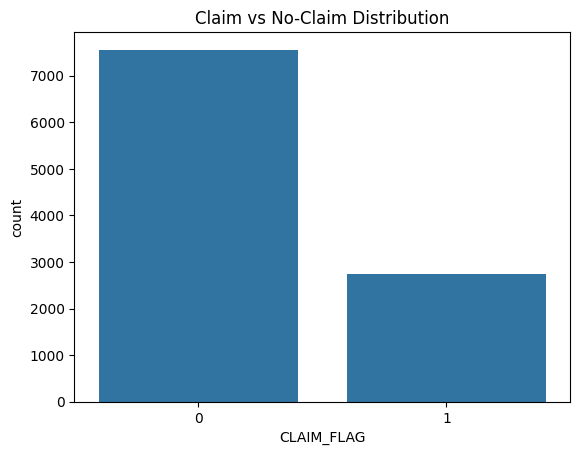

In [54]:

sns.countplot(x='CLAIM_FLAG', data=df)
plt.title('Claim vs No-Claim Distribution')
plt.show()

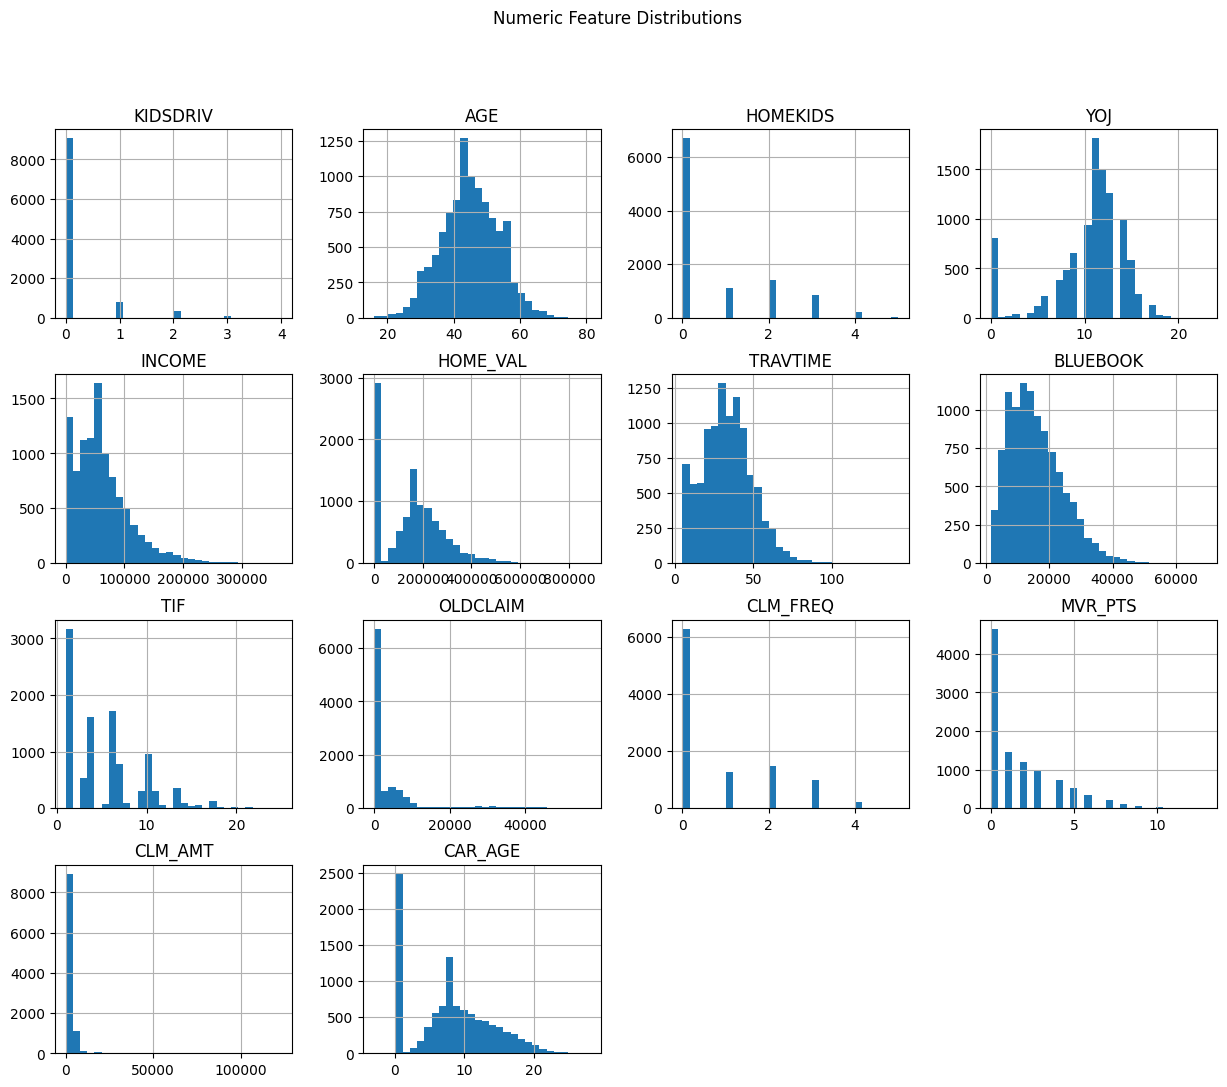

In [55]:
# Distribution of Numeric columns
df[num].hist(figsize=(15, 12), bins=30)
plt.suptitle("Numeric Feature Distributions")
plt.show()

Column: PARENT1, Unique values: 2


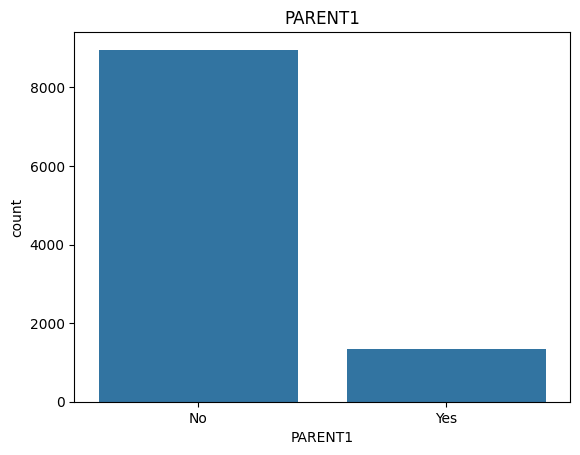

Column: MSTATUS, Unique values: 2


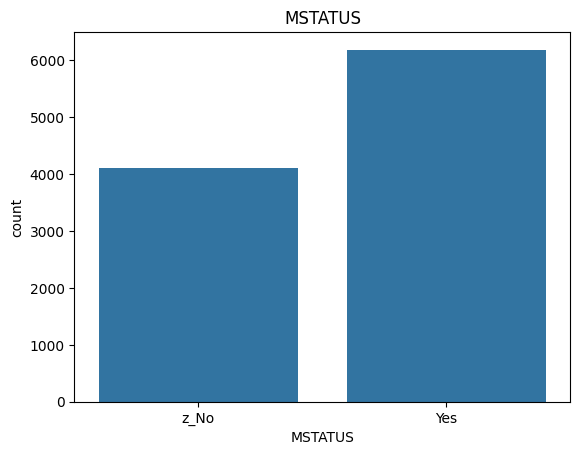

Column: GENDER, Unique values: 2


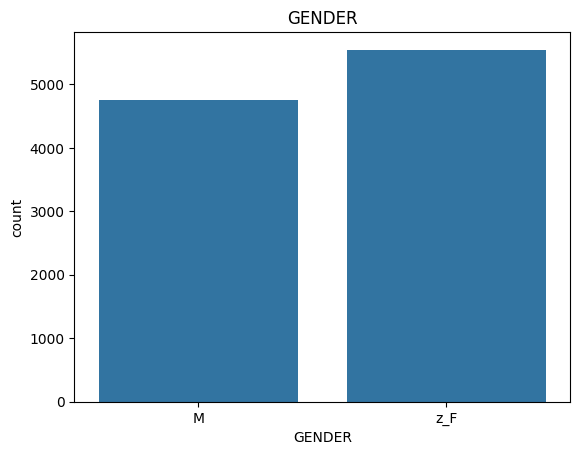

Column: EDUCATION, Unique values: 5


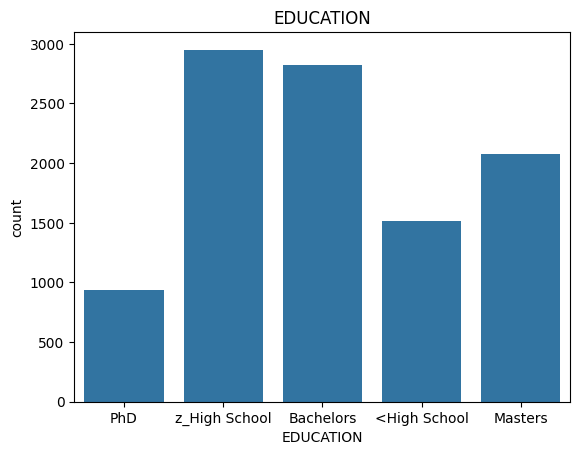

Column: OCCUPATION, Unique values: 9


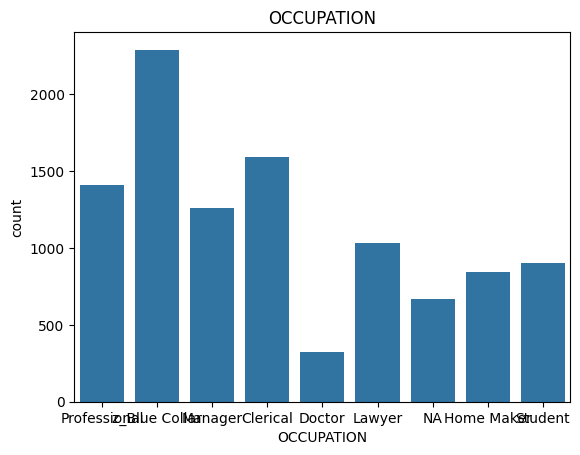

Column: CAR_USE, Unique values: 2


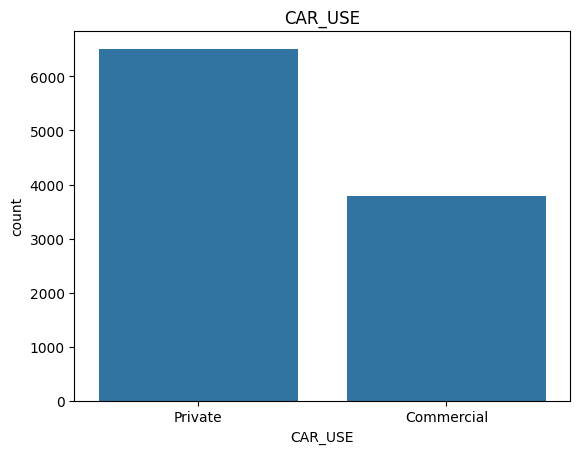

Column: CAR_TYPE, Unique values: 6


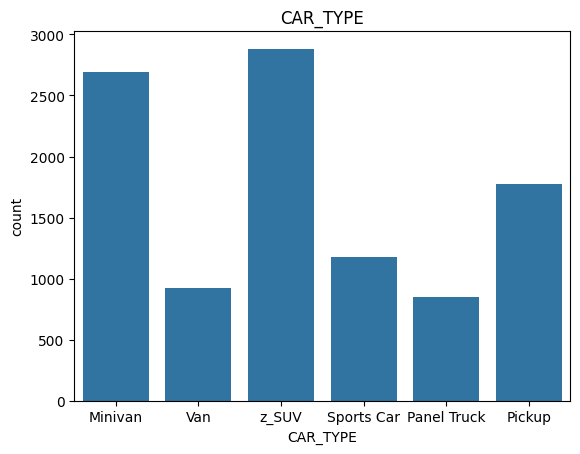

Column: RED_CAR, Unique values: 2


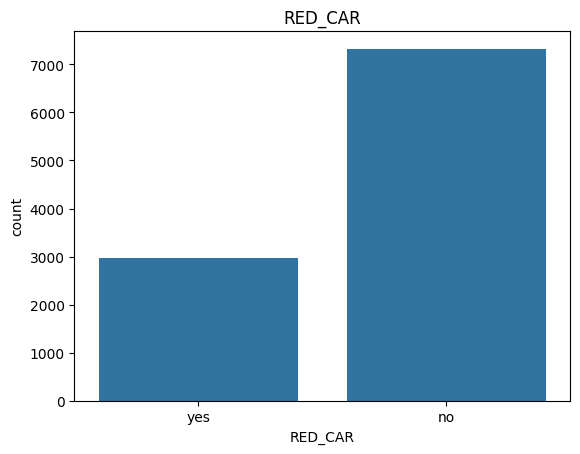

Column: REVOKED, Unique values: 2


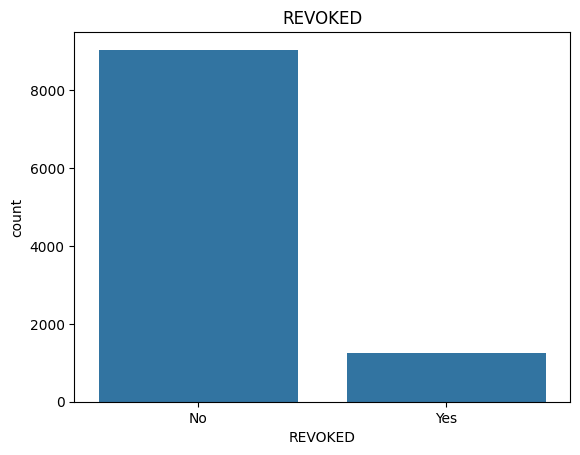

Column: URBANICITY, Unique values: 2


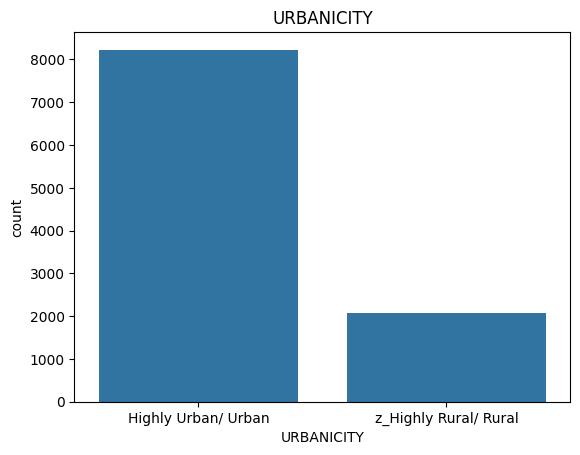

In [56]:
# Catgorical Value Frequencies
for col in cat:
    print(f'Column: {col}, Unique values: {df[col].nunique()}')
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.show()

In [57]:
# Feature Importance for categorical columns


scores = {}
for c in cat:
    scores[c]= mutual_info_score(df['CLAIM_FLAG'], df[c])
    
scores    

{'PARENT1': 0.011494993822164012,
 'MSTATUS': 0.008310961124589789,
 'GENDER': 0.00024252538330041262,
 'EDUCATION': 0.011744712814640068,
 'OCCUPATION': 0.01782255670722078,
 'CAR_USE': 0.009155913864051596,
 'CAR_TYPE': 0.009596618213796829,
 'RED_CAR': 2.7360108652785264e-05,
 'REVOKED': 0.01111146369615948,
 'URBANICITY': 0.03240420047113386}

In [58]:
# Most informative columns are 'URBANICITY' and OCCUPATION and are likely to claim insurance, weakest 'Gender' and 'RED_CAR'

In [59]:
# Setting up the Validation Framework

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state =1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state =1)
len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)


y_train = df_train.CLAIM_FLAG.values
y_val = df_val.CLAIM_FLAG.values
y_test = df_test.CLAIM_FLAG.values

del df_train['CLAIM_FLAG']
del df_val['CLAIM_FLAG']
del df_test['CLAIM_FLAG']

In [60]:
#Feature Selection

features = [
    'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL',
    'PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
    'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
    'OLDCLAIM', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'
    # note: no CLM_AMT, no CLM_FREQ
]

In [61]:
# Preparing data
def prepare_data(df_train, df_val):
    dv = DictVectorizer(sparse=False)
    
    train_dicts = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dicts)

    val_dicts = df_val.to_dict(orient='records')    
    X_val = dv.transform(val_dicts)
    
    return X_train, X_val, dv

In [62]:
X_train, X_val, dv = prepare_data(df_train[features], df_val[features])

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
    
y_val_pred_proba = model.predict_proba(X_val)[:,1]
roc_auc = round(roc_auc_score(y_val, y_val_pred_proba),3)

In [63]:
roc_auc

0.643

In [64]:
# Decision Tree

dt = DecisionTreeClassifier(max_depth=10, random_state=1)
dt.fit(X_train, y_train)
y_val_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_dt = roc_auc_score(y_val, y_val_pred_dt)
print("Decision Tree ROC AUC:", round(roc_auc_dt, 3))

Decision Tree ROC AUC: 0.713


In [65]:
roc_auc_dt

0.7134709076470716

In [69]:
# Random Forest

rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict on validation data
y_val_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_rf = roc_auc_score(y_val, y_val_pred_rf)

print("Random Forest ROC AUC:", round(roc_auc_rf, 3))

Random Forest ROC AUC: 0.783


In [72]:
# Random Forest Parameter Tuning

scores = [] 
for n in range (10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [73]:
df_scores

,n_estimators,auc
0,10,0.782574
1,20,0.798940
2,30,0.810628
3,40,0.814699
4,50,0.817835
5,60,0.820954
6,70,0.823351
7,80,0.825854
8,90,0.828367
9,100,0.828951


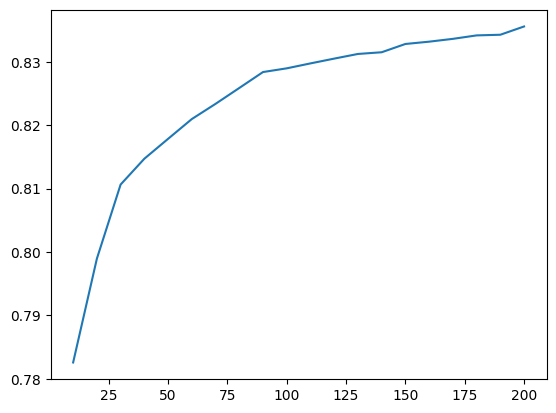

In [74]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [76]:
scores = []
for n in [10, 50, 100, 200]:
    for depth in [10, 15, 20, 25]:
            
        rf = RandomForestClassifier(
            n_estimators=n,
            max_depth=depth,
            random_state=1,
            n_jobs=-1
        )
            
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((n, depth, round(auc, 3)))

In [77]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth', 'auc'])

In [78]:
df_scores

,n_estimators,max_depth,auc
0,10,10,0.808
1,10,15,0.794
2,10,20,0.788
3,10,25,0.776
4,50,10,0.832
5,50,15,0.826
6,50,20,0.819
7,50,25,0.815
8,100,10,0.838
9,100,15,0.833


In [ ]:
# Best Parameter is n_estimators: 100 and depth: 10

In [ ]:
#Selecting the final model
#Choosing between logistic regression, decision tree and random forest, random forest is the best model with accuracy of 83.7 percent 